In [2]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
# from brownian_ot.brownian_ot import analysis
import os
# %matplotlib inline
import analysis as ana

In [3]:
folders = ["L1","L2","L3","L4","L5"]
# folders = ["L2","L-2"]
# folders = ["L2","L-2","E2-1-0.5j","E2-1-1j"]
# folders = ["L2","E2-1-0.5j","E2-1-1j"]

data = []
Path = "/Users/mohod/Developer/OTSIM/otsim_data/"
for folder in folders:
    files = os.listdir(Path+folder+"/data")
    files.sort()
    trajs=[]
    for file in files:
        trajs.append([file,ana.expand_trajectory(np.load(Path+folder+"/data/"+file))])
    data.append([folder, trajs])

In [4]:
for inf in data:
    radis = []
    RCPx=[]
    RCPy=[]
    LCPx=[]
    LCPy=[]
    for traj in inf[1]:
        r = np.average(np.sqrt(np.square(traj[1][:,0])+np.square(traj[1][:,1])))
        parameters = traj[0].split("_")
        if parameters[0] =="RCP":
            RCPx.append(float(parameters[1]))
            RCPy.append(r)
        if parameters[0] =="LCP":
            LCPx.append(float(parameters[1]))
            LCPy.append(r)
    inf.append([RCPx,RCPy,LCPx,LCPy])



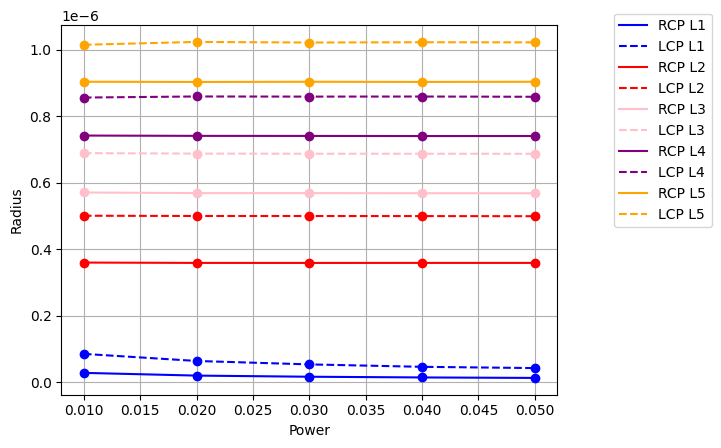

In [5]:
colors=["blue", "red", "pink", "purple", "orange"]
count =0
for traj in data:
    plt.plot(traj[2][0],traj[2][1],color = colors[count], label = "RCP "+traj[0])
    plt.plot(traj[2][2],traj[2][3],"--",color = colors[count], label = "LCP "+traj[0])
    plt.plot(traj[2][0],traj[2][1],"o",color = colors[count])
    plt.plot(traj[2][2],traj[2][3],"o",color = colors[count])
    count+=1
plt.xlabel("Power")
plt.ylabel("Radius")
plt.legend(bbox_to_anchor=(1.1, 1.05))
    # plt.figure()
plt.grid()

In [6]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [7]:
def getfreq (traj):
    N = len(traj)
    fs = 1e5
    tstep = 1/fs
    fstep = fs/N
    f = np.linspace(0,int(N-1)*fstep,N)
    F = np.fft.fftfreq(N,1/fs)
    fp = np.where(F>=0)
    testFFT = np.fft.fft(traj)
    testFFT_mag = np.abs(testFFT)/N
    f_plot = f[0:int((N/2)+1)]
    testFFT_mag_plot = 2 * testFFT_mag[0:int((N/2)+1)]
    testFFT_mag_plot[0] = testFFT_mag_plot[0] /2
    curmax =0
    std_passes =0
    for i in range(len(f_plot)):
        if testFFT_mag_plot[i] > curmax:
            curmax = testFFT_mag_plot[i]
            std_passes = f_plot[i]
    return std_passes



In [8]:
def getplotfreq(traj):
        #comb fft
    N = len(traj)
    fs = 82000
    tstep = 1/fs
    fstep = fs/N
    f = np.linspace(0,int(N-1)*fstep,N)
    F = np.fft.fftfreq(N,1/fs)
    fp = np.where(F>=0)


    testFFT = np.fft.fft(traj)
    testFFT_mag = np.abs(testFFT)/N
    # testFFT_mag = testFFT/N

    f_plot = f[0:int((N/2)+1)]
    # f_plot = f
    testFFT_mag_plot = 2 * testFFT_mag[0:int((N/2)+1)]
    # testFFT_mag_plot = 2 * testFFT_mag
    testFFT_mag_plot[0] = testFFT_mag_plot[0] /2
    # print(len(testFFT_mag_plot))
    en = 1000
    testFFT_mag_plot = testFFT_mag_plot[0:en]
    f_plot=f_plot[0:en]
    #plot fft


    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 101, 1)
    minor_ticks = np.arange(0, 101, 1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)


    plt.title("FFT plot of combined signal")

    ax.plot(f_plot,testFFT_mag_plot,"-b")
    plt.rcParams["figure.figsize"] =  [50,5]
    plt.rcParams["figure.autolayout"] = True
    plt.savefig("CombinedFFT.svg", format="svg")
    plt.axis([0, 70, 0, 2])
    plt.grid()
    plt.show()

In [9]:

for inf in data:
    # plt.figure(figsize=(20,5))
    RCPx=[]
    RCPy=[]
    LCPx=[]
    LCPy=[]
    for traj in inf[1]:
        # pass_x = []
        # mean = 0
        # count = 50000
        # # print(inf[0],traj[0])
        # # plt.plot(traj[1][:,0])
        # pop = smooth(traj[1][count:,0],20)
        # for i in pop:
        #     if i > mean-1e-10 and i < mean+1e-10:
        #     # if i==0:
        #         pass_x.append(count)
        #     count+=1
        # std_passes = np.std(pass_x)*2*1e-5
        # std_passes = (2*np.pi)/std_passes
        
        std_passes = getfreq(traj[1][:,0])
        # print(std_passes)
        # print(type(std_passes))
        parameters = traj[0].split("_")
        if parameters[0] =="RCP":
            RCPx.append(float(parameters[1]))
            RCPy.append(std_passes)
        if parameters[0] =="LCP":
            LCPx.append(float(parameters[1]))
            LCPy.append(std_passes)
    # plt.figure()
    inf.append([RCPx,RCPy,LCPx,LCPy])

In [10]:
# # colors=["blue", "red", "pink", "purple", "orange"]
# count =0
# # fig, axes = plt.subplots(nrows=len(folders), figsize=(20, 10),sharex=True)

# for traj in data:
#     plt.plot(traj[3][0],traj[3][1],color =colors[count], label = "RCP "+traj[0])
#     plt.plot(traj[3][2],traj[3][3],"--",color =colors[count], label = "LCP "+traj[0])
#     plt.plot(traj[3][0],traj[3][1],"x",color = "black")
#     plt.plot(traj[3][2],traj[3][3],"x",color = "black")
#     count+=1
# plt.xlabel("Power")
# plt.ylabel("Frequency")
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.grid()

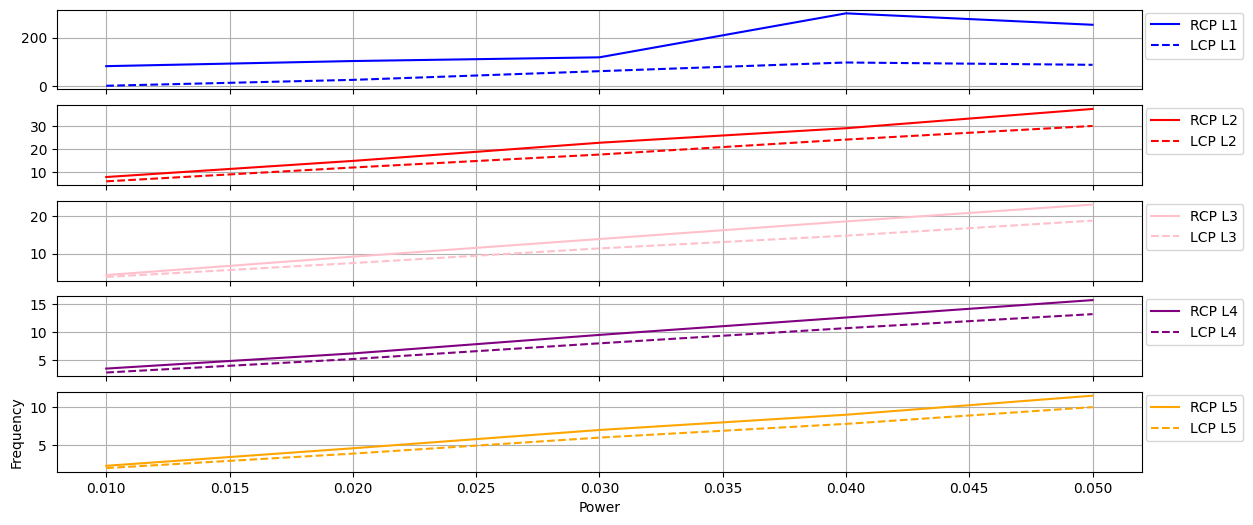

In [13]:
# colors=["blue", "red", "pink", "purple", "orange"]
count =0
fig, axes = plt.subplots(nrows=len(folders), figsize=(14, 6),sharex=True)

for traj in data:
    axes[count].plot(traj[3][0],traj[3][1],color =colors[count], label = "RCP "+traj[0])
    axes[count].plot(traj[3][2],traj[3][3],"--",color =colors[count], label = "LCP "+traj[0])
    # plt.plot(traj[3][0],traj[3][1],"o",color = "black")
    # plt.plot(traj[3][2],traj[3][3],"o",color = "black")
    plt.xlabel("Power")
    plt.ylabel("Frequency")
    axes[count].legend(bbox_to_anchor=(1.1, 1.05))
    axes[count].grid()
    count+=1
    